In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/transformed_data.csv', index_col=0)

# General overview
## Number of instances vs time (of the year)

In [3]:
#number of instances over the years
data.year.value_counts().sort_index()

2013     2702
2014    11179
2015    11481
2016     1367
Name: year, dtype: int64

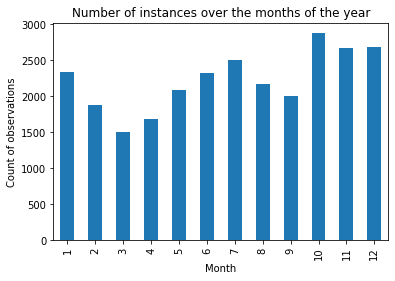

In [4]:
#number of instances over the months (aggregated)
plt.title('Number of instances over the months of the year')
data.month.value_counts().sort_index().plot.bar()
plt.xlabel("Month")
plt.ylabel("Count of observations")
plt.show()

## Number of Dogs and Cats

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

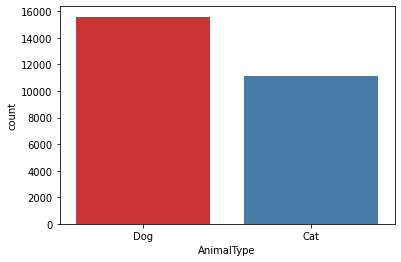

In [5]:
sns.countplot(data=data, x="AnimalType", palette='Set1')

## Rates of different outcomes (also over time)

In [6]:
#counts of the different outcomes
data.OutcomeType.value_counts().sort_index()

Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Name: OutcomeType, dtype: int64

Now we will see how the share of different outcomes change with the month of the year

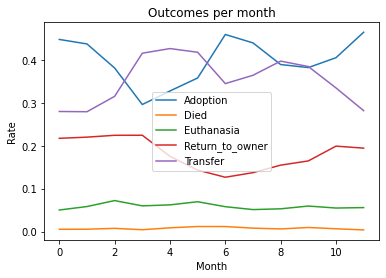

In [7]:
share_of_outcomes = np.zeros((12, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for m in range(1, 13):
    share_of_outcomes[m - 1] = data[data.month == m].OutcomeType.value_counts().sort_index()
    share_of_outcomes[m - 1] = share_of_outcomes[m - 1] / np.sum(share_of_outcomes[m - 1])

share_of_outcomes = share_of_outcomes.T

plt.title('Outcomes per month')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rate")
plt.show()

And the same over multiple years:

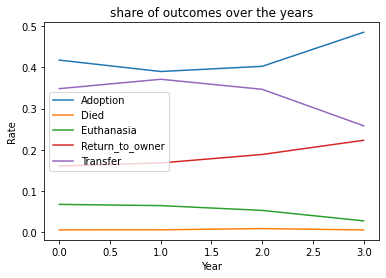

In [8]:
#now the same over the years
share_of_outcomes = np.zeros((4, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for y in [2013, 2014, 2015, 2016]:
    share_of_outcomes[y - 2013] = data[data.year == y].OutcomeType.value_counts().sort_index()
    share_of_outcomes[y - 2013] = share_of_outcomes[y - 2013] / np.sum(share_of_outcomes[y - 2013])

share_of_outcomes = share_of_outcomes.T

plt.title('share of outcomes over the years')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.show()

Here we have a kind of nice insight that the rates of adoption and return to owner increase over the years, but the rate of transfer decreases over the years.

## Age distribution

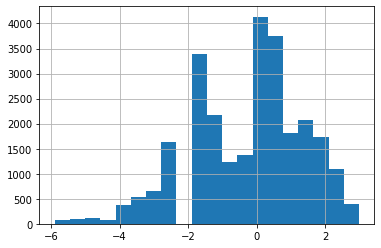

In [9]:
# sns.distplot(data.AgeuponOutcome, bins = 20, kde=False)
# TODO @Lukas what to the negative values mean?
data[data.AgeuponOutcome != 0].AgeuponOutcome.apply(np.log).hist(bins=20)
plt.show()

## Outcomes vs. sex and neutralization

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

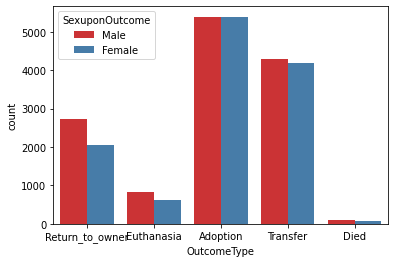

In [10]:
#plot outcomes in relation to the sex
sns.countplot(data=data, x="OutcomeType", hue="SexuponOutcome", palette='Set1')

# for s in ['Male','Female']:
#     data_ = data[data.SexuponOutcome == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by sex')
# plt.legend()
# plt.show()

seems like there are only minor differences

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

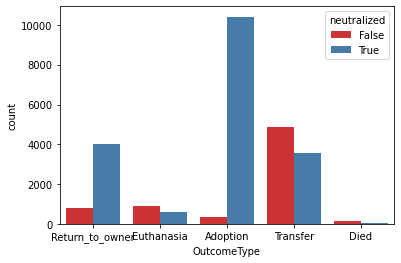

In [11]:
#plot outcomes in relation to neutralization
sns.countplot(data=data, x="OutcomeType", hue="neutralized", palette='Set1')

# for s in [True,False]:
#     data_ = data[data.neutralized == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by neutralization')
# plt.legend()
# plt.show()

Now thats interesting!

## Outcomes for dog vs. cat

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

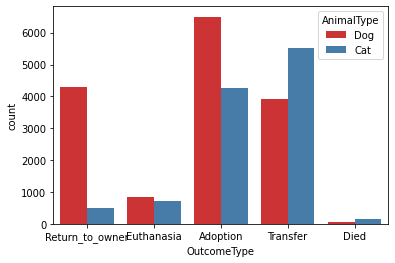

In [12]:
#plot outcomes in relation to the kind of animal
sns.countplot(data=data, x='OutcomeType', hue='AnimalType', palette="Set1")

# for s in ['Dog','Cat']:
#     data_ = data[data.AnimalType == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by kind of animal')
# plt.legend()
# plt.show()

This also seems interesting!

## Outcome by maturity
We consider an animal to be an adult if its older than 1 year and check if this has an influence on its outcome.

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

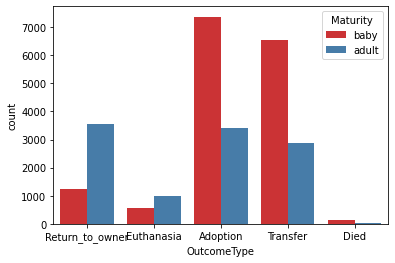

In [13]:
plot_data = data.copy()
plot_data['Maturity'] = ["baby" if x <= 1 else "adult" for x in data["AgeuponOutcome"]]

sns.countplot(data=plot_data, x="OutcomeType", hue="Maturity", palette='Set1')

Unsurprisingly younger animals get adopted more often.

## Outcome by age timeline

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Outcome by Age')]

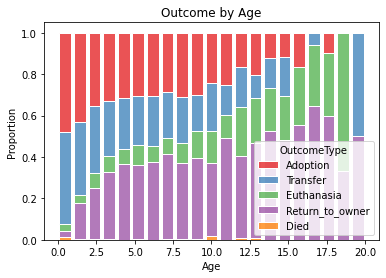

In [14]:
plot_data = data.copy()
plot_data["AgeuponOutcome"] = plot_data["AgeuponOutcome"].round(decimals=0)
x, y, hue = "AgeuponOutcome", "proportion", "OutcomeType"

plot_data = plot_data[hue].groupby(plot_data[x]).value_counts(normalize=True).rename(y).reset_index()

ax = sns.histplot(
    plot_data,
    x=x,
    weights=y,
    hue=hue,
    multiple='stack',
    palette="Set1",
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    bins=21
)

#specfiy axis labels
ax.set(xlabel='Age',
       ylabel='Proportion',
       title='Outcome by Age')
